Mount Google Drive

In [114]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DS5230_Project/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1VDNu1UgCrikOKRQws_HNNIKQJ4YbCTvu/DS5230_Project


Import Libraries

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

Load Data

In [207]:
model_data_yearly1 = pd.read_csv('Code/Data/model_data_yearly1.csv')
model_data_yearly2 = pd.read_csv('Code/Data/model_data_yearly2.csv')
model_data1 = pd.read_csv('Code/Data/model_data1.csv')
model_data2 = pd.read_csv('Code/Data/model_data2.csv')

DBSCAN - All Years

In [208]:
data = model_data2.drop(['DISTRICT', 'White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)

In [209]:
data

,MONTH,DAY_OF_WEEK,HOUR,Median Age,Less than High School,Bachelor's Degree or more,Poverty rate,AIRCRAFT,ARSON,ASSAULT,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,7.033408,4.034134,12.513945,32.986141,0.094995,0.736119,0.153507,0.006881,0.052394,18.347000,...,0.207862,0.438652,3.255942,0.261958,0.079964,7.239948,7.067827,1.594640,1.818416,6.784553
1,6.990224,3.826041,13.093500,34.900000,0.088483,0.649333,0.171833,0.000000,0.035865,5.606626,...,0.000000,0.354359,0.944578,0.253053,0.166541,4.608553,5.037885,2.570483,1.191922,1.192759
2,6.967226,3.962442,13.076501,32.866667,0.297417,0.251333,0.185000,0.220112,0.018161,5.467322,...,0.003705,0.332539,1.238325,0.122911,0.137881,3.329743,4.537581,2.676015,1.435600,1.296317
3,6.929485,3.913553,13.237799,30.097267,0.206361,0.319703,0.348782,0.008671,0.074677,13.924128,...,0.100164,0.805532,2.378504,0.702133,0.145011,3.417453,8.010383,9.089829,4.043674,3.692102
4,6.984170,3.949746,13.275074,37.066667,0.173133,0.183667,0.203000,0.000000,0.111243,29.772719,...,0.019438,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210
5,6.954368,3.935199,13.067816,33.133333,0.190950,0.271667,0.227667,0.000000,0.015923,6.339770,...,0.089078,0.536698,1.259134,0.223159,0.098609,2.583718,4.759928,4.975176,1.687260,1.881792
6,6.992721,3.969458,12.768413,32.153269,0.079406,0.642607,0.145167,0.000000,0.028997,10.160311,...,0.078554,0.373794,1.591727,0.248840,0.139623,8.755471,7.343611,3.470135,1.363744,3.342219
7,7.051409,3.976169,12.820425,28.934509,0.076610,0.673646,0.225806,0.000000,0.018281,4.221752,...,0.109310,0.197901,0.561975,0.194145,0.093932,5.144274,3.598129,1.760091,0.917704,0.656967
8,7.006984,3.955507,12.983868,30.529933,0.074968,0.729393,0.264864,0.004036,0.033832,9.089148,...,0.046381,0.317460,1.705076,0.094601,0.079262,5.649420,5.130293,2.166338,1.369631,2.904208
9,6.970813,3.879755,13.350468,34.100000,0.079483,0.645500,0.150833,0.000000,0.025313,7.309472,...,0.004254,0.306405,1.441597,0.318479,0.119816,5.239595,4.924821,3.472188,2.498392,2.159070


In [210]:
districts = pd.DataFrame(model_data2['DISTRICT'])

Determine optimal eps using 1 nearest neighbor since there are so few districts and we want all to be given a cluster (no noise districts)

In [211]:
neighbors = NearestNeighbors(n_neighbors = 1)
y_neighbors = neighbors.fit(data)
distances, indices = y_neighbors.kneighbors(data)

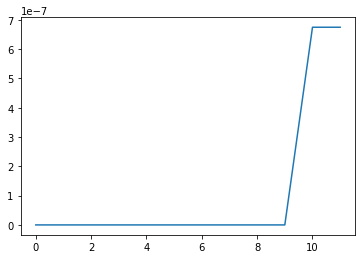

In [212]:
distances = np.sort(distances, axis = 0)
distances = distances[:,0]
plt.plot(distances)
plt.show()

This graph doesn't create a nice curve, but if you have to pick an elbow it occurs at 9. However, given that there isn't really a curve and this would result in 8 clusters which is quite high, I decided to use an eps of 10 instead. Having a similar number of clusters to the other algorithms will also allow for easier comparisons

In [205]:
#dbscan = DBSCAN(eps = 10, min_samples = 1)
#y_dbscan = dbscan.fit_predict(data)
#silhouette_score(data, dbscan.labels_)

0.19200168803401507

In [213]:
dbscan = DBSCAN(eps = 10, min_samples = 1)
y_dbscan = dbscan.fit_predict(data)

In [214]:
clusters = pd.DataFrame(dbscan.labels_)

In [215]:
dbscan_pred = districts.join(clusters)
dbscan_pred = dbscan_pred.rename(columns = {0 : 'All_Years'})

In [216]:
dbscan_pred

,DISTRICT,All_Years
0,A1,0
1,A15,1
2,A7,1
3,B2,2
4,B3,3
5,C11,1
6,C6,4
7,D14,1
8,D4,5
9,E13,1


Silhouette Score

In [217]:
s_score = [['Total', silhouette_score(data, dbscan.labels_)]]
silhouette_scores = pd.DataFrame(s_score, columns = ['Year', 'Silhouette_Score'])
s_total = silhouette_score(data, dbscan.labels_)

In [218]:
silhouette_scores

,Year,Silhouette_Score
0,Total,0.192002


DBSCAN - By Year

In [219]:
yearly_data = model_data_yearly2.drop(['DISTRICT', 'White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)

In [220]:
data_2015 = yearly_data[yearly_data['YEAR'] == 2015].drop('YEAR', axis = 1)
data_2016 = yearly_data[yearly_data['YEAR'] == 2016].drop('YEAR', axis = 1)
data_2017 = yearly_data[yearly_data['YEAR'] == 2017].drop('YEAR', axis = 1)
data_2018 = yearly_data[yearly_data['YEAR'] == 2018].drop('YEAR', axis = 1)
data_2019 = yearly_data[yearly_data['YEAR'] == 2019].drop('YEAR', axis = 1)
data_2020 = yearly_data[yearly_data['YEAR'] == 2020].drop('YEAR', axis = 1)

In [221]:
districts_2015 = model_data_yearly2[model_data_yearly2['YEAR'] == 2015][['DISTRICT']].reset_index(drop = True)
districts_2016 = model_data_yearly2[model_data_yearly2['YEAR'] == 2016][['DISTRICT']].reset_index(drop = True)
districts_2017 = model_data_yearly2[model_data_yearly2['YEAR'] == 2017][['DISTRICT']].reset_index(drop = True)
districts_2018 = model_data_yearly2[model_data_yearly2['YEAR'] == 2018][['DISTRICT']].reset_index(drop = True)
districts_2019 = model_data_yearly2[model_data_yearly2['YEAR'] == 2019][['DISTRICT']].reset_index(drop = True)
districts_2020 = model_data_yearly2[model_data_yearly2['YEAR'] == 2020][['DISTRICT']].reset_index(drop = True)

In [222]:
dbscan = DBSCAN(eps = 10, min_samples = 1)

In [223]:
y_dbscan = dbscan.fit_predict(data_2015)
clusters = pd.DataFrame(dbscan.labels_)
dbscan_pred_2015 = districts_2015.join(clusters)
dbscan_pred_2015 = dbscan_pred_2015.rename(columns = {0 : '2015'})

s_2015 = silhouette_score(data, dbscan.labels_)
s_score = [['2015', silhouette_score(data, dbscan.labels_)]]
silhouette_scores = silhouette_scores.append(pd.DataFrame(s_score, columns=[ 'Year', 'Silhouette_Score']), ignore_index = True)

In [224]:
y_dbscan = dbscan.fit_predict(data_2016)
clusters = pd.DataFrame(dbscan.labels_)
dbscan_pred_2016 = districts_2016.join(clusters)
dbscan_pred_2016 = dbscan_pred_2016.rename(columns = {0 : '2016'})

s_2016 = silhouette_score(data, dbscan.labels_)
s_score = [['2016', silhouette_score(data, dbscan.labels_)]]
silhouette_scores = silhouette_scores.append(pd.DataFrame(s_score, columns=[ 'Year', 'Silhouette_Score']), ignore_index = True)

In [225]:
y_dbscan = dbscan.fit_predict(data_2017)
clusters = pd.DataFrame(dbscan.labels_)
dbscan_pred_2017 = districts_2017.join(clusters)
dbscan_pred_2017 = dbscan_pred_2017.rename(columns = {0 : '2017'})

s_2017 = silhouette_score(data, dbscan.labels_)
s_score = [['2017', silhouette_score(data, dbscan.labels_)]]
silhouette_scores = silhouette_scores.append(pd.DataFrame(s_score, columns=[ 'Year', 'Silhouette_Score']), ignore_index = True)

In [226]:
y_dbscan = dbscan.fit_predict(data_2018)
clusters = pd.DataFrame(dbscan.labels_)
dbscan_pred_2018 = districts_2018.join(clusters)
dbscan_pred_2018 = dbscan_pred_2018.rename(columns = {0 : '2018'})

s_2018 = silhouette_score(data, dbscan.labels_)
s_score = [['2018', silhouette_score(data, dbscan.labels_)]]
silhouette_scores = silhouette_scores.append(pd.DataFrame(s_score, columns=[ 'Year', 'Silhouette_Score']), ignore_index = True)

In [227]:
y_dbscan = dbscan.fit_predict(data_2019)
clusters = pd.DataFrame(dbscan.labels_)
dbscan_pred_2019 = districts_2019.join(clusters)
dbscan_pred_2019 = dbscan_pred_2019.rename(columns = {0 : '2019'})

s_2019 = silhouette_score(data, dbscan.labels_)
s_score = [['2019', silhouette_score(data, dbscan.labels_)]]
silhouette_scores = silhouette_scores.append(pd.DataFrame(s_score, columns=[ 'Year', 'Silhouette_Score']), ignore_index = True)

In [228]:
y_dbscan = dbscan.fit_predict(data_2020)
clusters = pd.DataFrame(dbscan.labels_)
dbscan_pred_2020 = districts_2020.join(clusters)
dbscan_pred_2020 = dbscan_pred_2020.rename(columns = {0 : '2020'})

s_2020 = silhouette_score(data, dbscan.labels_)
s_score = [['2020', silhouette_score(data, dbscan.labels_)]]
silhouette_scores = silhouette_scores.append(pd.DataFrame(s_score, columns=[ 'Year', 'Silhouette_Score']), ignore_index = True)

In [229]:
dbscan_pred = pd.merge(dbscan_pred, dbscan_pred_2015, on = 'DISTRICT')
dbscan_pred = pd.merge(dbscan_pred, dbscan_pred_2016, on = 'DISTRICT')
dbscan_pred = pd.merge(dbscan_pred, dbscan_pred_2017, on = 'DISTRICT')
dbscan_pred = pd.merge(dbscan_pred, dbscan_pred_2018, on = 'DISTRICT')
dbscan_pred = pd.merge(dbscan_pred, dbscan_pred_2019, on = 'DISTRICT')
dbscan_pred = pd.merge(dbscan_pred, dbscan_pred_2020, on = 'DISTRICT')

In [239]:
dbscan_pred

,DISTRICT,All_Years,2015,2016,2017,2018,2019,2020
0,A1,0,0,0,0,0,0,0
1,A15,1,1,1,1,1,1,1
2,A7,1,1,2,1,1,1,1
3,B2,2,1,3,2,2,2,2
4,B3,3,2,4,3,3,3,3
5,C11,1,1,2,1,1,1,1
6,C6,4,1,5,4,4,4,4
7,D14,1,1,6,1,1,1,1
8,D4,5,3,7,5,5,5,0
9,E13,1,1,1,1,1,1,1


In [231]:
silhouette_scores

,Year,Silhouette_Score
0,Total,0.192002
1,2015,0.230885
2,2016,0.055560
3,2017,0.154346
4,2018,0.154346
5,2019,0.111669
6,2020,0.099920


In [232]:
print("Overall:", s_total)
print("2015:", s_2015)
print("2016:", s_2016)
print("2017:", s_2017)
print("2018:", s_2018)
print("2019:", s_2019)
print("2020:", s_2020)

Overall: 0.19200168803401507
2015: 0.2308850609462116
2016: 0.05555974165678296
2017: 0.15434591993199648
2018: 0.15434591993199648
2019: 0.11166897643310641
2020: 0.09992015843394884


Gather cluster characteristics

In [236]:
data_clusters = model_data2.drop(['White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)
data_clusters = pd.merge(data_clusters, dbscan_pred[['DISTRICT', 'All_Years']], on = 'DISTRICT')

In [237]:
summary = data_clusters.groupby('All_Years', as_index = False).mean()

In [238]:
summary.to_csv('Code/For GitHub/DBSCAN_summary.csv', index = None)